In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/sales_predictions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Existen datos faltantes en la columna 'Item_Weight' y 'Outlet_Size', ambos casos son Not missing at random (NMAR).
En cuanto a 'Outlet_Size', se puede identificar que los datos faltantes corresponden a data de los anios 1998, 2002 y 2007. Para este caso, se utilizara el Most Frequent Values para rellenar los datos faltantes
Por otro lado, en la columna 'Item_Weight' todos los datos faltantes corresponden al anio 1985. Para este caso, se rellenaran los datos con la media de todos los datos de la columna.

Por último, en Item_Fat_Content se homogeneizarán las etiquetas low fat, y LF por "Low Fat. Asimismo con reg por "Regular".

In [15]:
# Sacando el valor promedio de la columna 'Item_Weight'...
weight_mean = round(df['Item_Weight'].mean(),2)
weight_mean

12.86

In [16]:
# Rellenando valores NaN de la columna
df['Item_Weight'] = df['Item_Weight'].fillna(weight_mean)
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [17]:
# Rellenando 'Outlet_Size' con el valor mas frecuente...
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].value_counts().index[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
# Cambiando valores repetidos en columnas.
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF":"Low Fat"},regex=True)
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"low fat":"Low Fat"},regex=True)
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"reg":"Regular"},regex=True)

# **Algunos datos agregados que pueden servir para el analisis:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


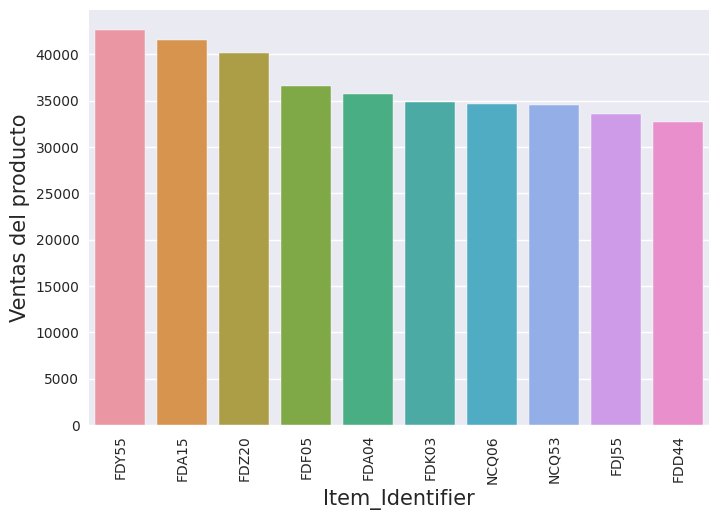

In [97]:
# Ventas totales por producto, los 10 más vendidos
ventas_totales = df.groupby(['Item_Identifier'])[['Item_Outlet_Sales']].sum().sort_values(by=['Item_Outlet_Sales'], ascending = False).head(10)

# Estableciendo valores eje x e y
plataformas = ventas_totales.index.unique()
ventas = ventas_totales['Item_Outlet_Sales'].values
# Tamaño del grafico
plt.figure(dpi=100)

sns.set_style('darkgrid')

x = plataformas
y = ventas

plt.xlabel('ID del ítem', fontsize = 15)
plt.ylabel('Ventas del producto', fontsize = 15)
sns.barplot(x, y)
plt.xticks(rotation = 90);
plt.show()

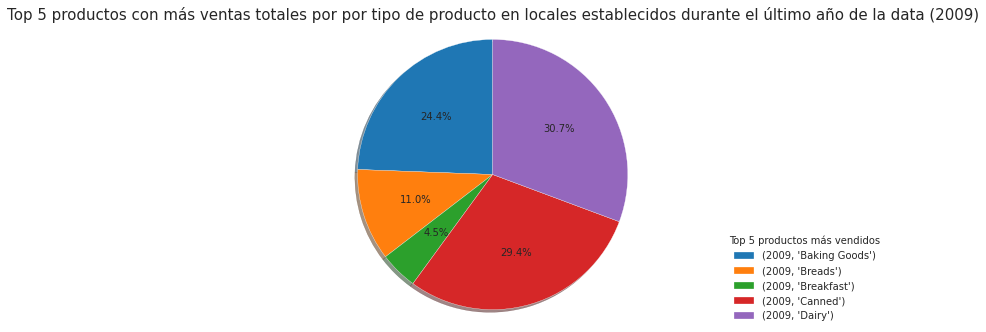

In [166]:
# Top 5 productos con más ventas totales por por tipo de producto en locales establecidos durante el último año de la data (2009)
df1 = df["Outlet_Establishment_Year"] == 2009
df1 = df.loc[df1,:]
ventas_tipo = df1.groupby(['Outlet_Establishment_Year', 'Item_Type'])[['Item_Outlet_Sales']].sum().sort_values(by=['Outlet_Establishment_Year'], ascending = False).head()

# Elaborando grafico
labelspie = ventas_tipo.index
sizespie = ventas_tipo['Item_Outlet_Sales'].values

colors = sns.color_palette('tab10')

fig1, ax1 = plt.subplots()
ax1.pie(sizespie, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)
ax1.axis('equal')
plt.legend(title="Top 5 productos más vendidos", loc=(1.02,0), labels = labelspie)
plt.title("Top 5 productos con más ventas totales por por tipo de producto en locales establecidos durante el último año de la data (2009)", size = 15)



plt.show()

In [21]:
colores = sns.color_palette("Paired") + sns.color_palette("tab10") + sns.color_palette("Set2")

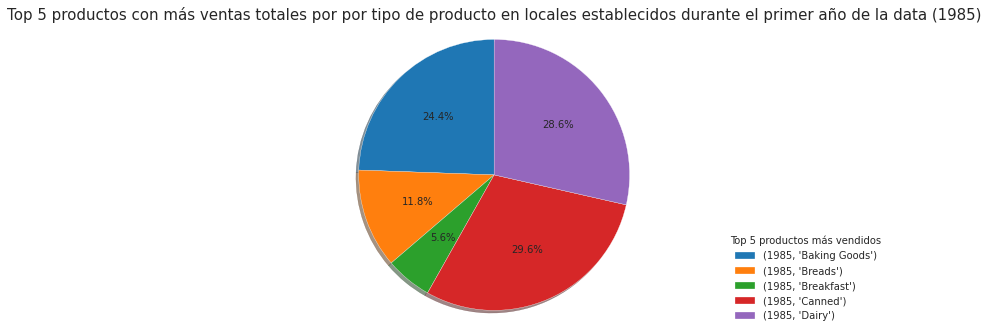

In [165]:
# Top 5 productos con más ventas totales por por tipo de producto en locales establecidos durante el primer año de la data (1985)
df2 = df["Outlet_Establishment_Year"] == df["Outlet_Establishment_Year"].min()
df2 = df.loc[df2,:]
ventas_tipo2 = df2.groupby(['Outlet_Establishment_Year', 'Item_Type'])[['Item_Outlet_Sales']].sum().sort_values(by=['Outlet_Establishment_Year'], ascending = False).head(5)

# Elaborando grafico
labelspie2 = ventas_tipo2.index
sizespie2 = ventas_tipo2['Item_Outlet_Sales'].values

colors = sns.color_palette('tab10')

fig1, ax1 = plt.subplots()
ax1.pie(sizespie2, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)
ax1.axis('equal')
plt.legend(title="Top 5 productos más vendidos", loc=(1.02,0), labels = labelspie2)
plt.title("Top 5 productos con más ventas totales por por tipo de producto en locales establecidos durante el primer año de la data (1985)", size = 15)




plt.show()

# Se puede concluir que los productos más vendidos no han cambiado al menos en el primero y último año de la data.

In [90]:
# La visibilidad promedio que se le da a productos tipo Low Fat y Regular a traves de los anios.
# Filtrando datos
lowfat = df['Item_Fat_Content'] == "Low Fat"
lowfat = df.loc[lowfat,:]

regular = df['Item_Fat_Content'] == "Regular"
regular = df.loc[regular,:]

visibilidad_lf = lowfat.groupby(['Outlet_Establishment_Year', 'Item_Fat_Content'])[['Item_Visibility']].mean()
visibilidad_reg = regular.groupby(['Outlet_Establishment_Year', 'Item_Fat_Content'])[['Item_Visibility']].mean()

# Conservando valores de productos LF y Regular
listareg = []
for i in range(0,len(visibilidad_reg.values),1):
  listareg.append(visibilidad_reg.values[i][0])

listalf = []
for i in range(0,len(visibilidad_lf.values),1):
  listalf.append(visibilidad_lf.values[i][0])


In [146]:
# Estableciendo años para el eje X
años = [1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009]

# Estableciendo etiquetas para leyenda

etiquetas = df['Item_Fat_Content'].unique()

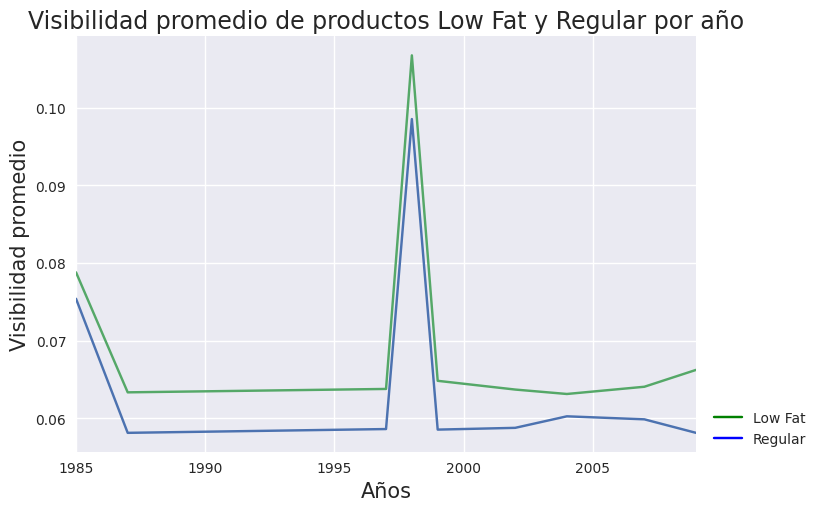

In [156]:
# Elaborando gráfico
plt.figure(dpi=100)
plt.style.use('seaborn')
sns.set_style('darkgrid')

plt.plot(años, listalf)
plt.plot(listalf[0], color="green", label=etiquetas[0])
plt.plot(años, listareg)
plt.plot(listareg[0], color="blue", label=etiquetas[1])
plt.legend()
plt.xlabel('Años', size = 15)
plt.ylabel('Visibilidad promedio', size = 15)
plt.xlim(left=1985,right=2009)
plt.title('Visibilidad promedio de productos Low Fat y Regular por año', size = 17)
plt.legend()
plt.legend(loc=(1.02,0))
plt.show()


# Se puede concluir que la visibilidad de lor productos low fat es históricamente mayor a los de tipo regular. Esto parece acentuarse en los últimos años. 